Logika XOR
```
 X1  | X2 | op
 ----|----|----
 0   | 0  | 0 
 1   | 0  | 1
 0   | 1  | 1
 1   | 1  | 0 
```





In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.DataFrame([[0,0,0],[1,0,1],[0,1,1],[1,1,0]],columns=['x1','x2','op'])

activation function = sigmoid ,it will convert value between 0-1 

In [3]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

first derivative of sigmoid

In [4]:
def derivativeSigmoid(z):
  return z*(1-z)

ANN 
layer input = 2 neuron (2 input)
1 hidden layer = 4 neuron
1 output layer = 1 between 0 and 1

In [17]:
epoch = 15000
weight1 = np.random.uniform(0,1,(2,4)) # input ke hidden
weight2 = np.random.uniform(0,1,(4,1)) # hidden ke output
bias1 = np.random.uniform(0,1,1)
bias2 = np.random.uniform(0,1,1)
learning_rate = 0.05

In [18]:
lists = []
for i in range(epoch):
  for j in range(data.shape[0]):
    mse=[]
    X = data.iloc[j][['x1','x2']].to_numpy().reshape(2,1)
    Y = data.iloc[j]['op']
    #forward
    hidin = np.dot(X.T,weight1) 
    hidin = hidin+bias1
    hidout = sigmoid(hidin)
    
    outin = np.dot(hidout,weight2)
    outin = outin+bias2
    outout = sigmoid(outin)

    out1 = outout-Y
    outtonet = derivativeSigmoid(outout)

    #backward2
    bias1 = bias1 - learning_rate*np.sum((out1*outtonet*weight2.T*derivativeSigmoid(hidout)))
    weight1 = weight1 - learning_rate*np.dot(X,(out1*outtonet*weight2.T*derivativeSigmoid(hidout)))
    bias2 = bias2-learning_rate*np.sum((out1*outtonet))
    weight2 = weight2 - learning_rate*(out1*outtonet*hidout.T)
    mse.append(out1)
  lists.append(np.mean(mse))

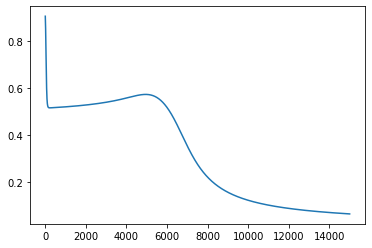

In [21]:
import matplotlib.pyplot as plt
plt.plot(np.array(lists).reshape(epoch,1))

In [27]:
pred=[]
for j in range(data.shape[0]):
    X = data.iloc[j][['x1','x2']].to_numpy().reshape(2,1)
    Y = data.iloc[j]['op']
    #forward
    hidin = np.dot(X.T,weight1) # 1x4
    hidin = hidin+bias1
    hidout = sigmoid(hidin) #1x4
    
    outin = np.dot(hidout,weight2) #1x1
    outin = outin+bias2
    outout = sigmoid(outin)#1x1
    pred.append(outout[0,0])

In [32]:
pd.crosstab(data['op'],np.array(pred).round())

col_0,0.0,1.0
op,,
0,2,0
1,0,2
